# Homework Reinforcement Learning

**Studente**: Riccardo Armando Di Prinzio

**Matricola**: 261132

In [1]:
from copy import deepcopy

import numpy as np
import pandas as pd
from IPython.display import Image

In [2]:
# settaggi utilizzati per la visualizzazione di
# tabelle Pandas DataFrame
pd.set_option("display.max_column", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.precision", 1)

# Cooking Chef

## Introduzione

- Allo scopo di utilizzare tecniche come la **Policy Iteration**, dobbiamo codificare il problema **Cooking Chef** come un **MDP**. Cioè come una tupla $(S, A, P, R, \gamma)$

- Verrà presentato un possibile approccio per la codifica dell'istanza presentata in **Figura 1** del problema

### Classi necessarie alla codifica e funzioni ausiliarie

#### Creazione griglia del problema

In [3]:
# funzione che crea le seguenti strutture dati:
#   - creazione dizionario `cooking_chef_states_tuples` che contiene l'associazione: stato -> tupla
#   - creazione dizionario `cooking_chef_tuples_states` che contiene l'associazione: tupla -> stato
def create_problem_grid():
    cooking_chef_states_tuples = {}
    cooking_chef_tuples_states = {}
    count = 0
    for i in range(1, 9):
        for j in range(1, 10):
            if not (
                (i, j) == (1, 5)
                or (i, j) == (3, 5)
                or (i, j) == (4, 5)
                or (i, j) == (5, 5)
                or (i, j) == (7, 5)
                or (i, j) == (8, 5)
            ):
                cooking_chef_states_tuples[count] = (i, j)
                cooking_chef_tuples_states[(i, j)] = count
                count += 1
    return cooking_chef_states_tuples, cooking_chef_tuples_states


cooking_chef_states_tuples, cooking_chef_tuples_states = create_problem_grid()

#### Funzioni ausiliarie

In [4]:
# funzione che stampa a video la griglia di stati del problema.
#
# `dict_view`: parametro utilizzato per specificare se stampare
# la griglia di stati oppure la griglia di tuple che corrispondono
# alle caselle utilizzabili del problema
def print_states(dict_view=False):
    tiles = [i for i in range(0, len(cooking_chef_states_tuples))]
    row_8 = tiles[58:66]
    row_7 = tiles[50:58]
    row_6 = tiles[41:50]
    row_5 = tiles[33:41]
    row_4 = tiles[25:33]
    row_3 = tiles[17:25]
    row_2 = tiles[8:17]
    row_1 = tiles[0:8]

    rows = row_8, row_7, row_6, row_5, row_4, row_3, row_2, row_1

    if dict_view:
        for row in rows:
            for i in row:
                print(f" {cooking_chef_states_tuples[i]} ", end="")
                if (
                    cooking_chef_states_tuples[i] == (8, 4)
                    or cooking_chef_states_tuples[i] == (7, 4)
                    or cooking_chef_states_tuples[i] == (5, 4)
                    or cooking_chef_states_tuples[i] == (4, 4)
                    or cooking_chef_states_tuples[i] == (3, 4)
                    or cooking_chef_states_tuples[i] == (1, 4)
                ):
                    print("        ", end="")
            if row == row_5:
                print("\n\n")
            else:
                print()
    else:
        for row in rows:
            for i in row:
                print(f" {i:<2} ", end="")
                if (
                    cooking_chef_states_tuples[i] == (8, 4)
                    or cooking_chef_states_tuples[i] == (7, 4)
                    or cooking_chef_states_tuples[i] == (5, 4)
                    or cooking_chef_states_tuples[i] == (4, 4)
                    or cooking_chef_states_tuples[i] == (3, 4)
                    or cooking_chef_states_tuples[i] == (1, 4)
                ):
                    print("    ", end="")
            if row == row_5:
                print("\n\n")
            else:
                print()

In [5]:
# funzione che stampa a video la policy passata come
# parametro.
#
# `policy`: array che corrisponde alla policy da stampare
def print_policy(policy: np.ndarray = None):
    # 0 -> left : ←
    # 1 -> right: →
    # 2 -> up   : ↑
    # 3 -> down : ↓
    # 4 -> take_egg_beater : T
    # 5 -> cook_eggs : C
    actions = ["←", "→", "↑", "↓", "T", "C"]

    tiles = [i for i in range(0, len(cooking_chef_states_tuples))]
    row_8 = tiles[58:66]
    row_7 = tiles[50:58]
    row_6 = tiles[41:50]
    row_5 = tiles[33:41]
    row_4 = tiles[25:33]
    row_3 = tiles[17:25]
    row_2 = tiles[8:17]
    row_1 = tiles[0:8]

    rows = row_8, row_7, row_6, row_5, row_4, row_3, row_2, row_1

    for row in rows:
        for i in row:
            print(f" {actions[policy[i]]} ", end="")
            if (
                cooking_chef_states_tuples[i] == (8, 4)
                or cooking_chef_states_tuples[i] == (7, 4)
                or cooking_chef_states_tuples[i] == (5, 4)
                or cooking_chef_states_tuples[i] == (4, 4)
                or cooking_chef_states_tuples[i] == (3, 4)
                or cooking_chef_states_tuples[i] == (1, 4)
            ):
                print("   ", end="")
        if row == row_5:
            print("\n\n")
        else:
            print()

In [6]:
# funzione che stampa a video la state value function
# della policy pi passata come parametro.
#
# `V_pi`: array che corrisponde alla state value function
# della policy pi da stampare
def print_state_value_function(V_pi: np.ndarray = None):
    tiles = [i for i in range(0, len(cooking_chef_states_tuples))]
    row_8 = tiles[58:66]
    row_7 = tiles[50:58]
    row_6 = tiles[41:50]
    row_5 = tiles[33:41]
    row_4 = tiles[25:33]
    row_3 = tiles[17:25]
    row_2 = tiles[8:17]
    row_1 = tiles[0:8]

    rows = row_8, row_7, row_6, row_5, row_4, row_3, row_2, row_1

    for row in rows:
        for i in row:
            print(f" {round(V_pi[i], 2):<8} ", end="")
            if (
                cooking_chef_states_tuples[i] == (8, 4)
                or cooking_chef_states_tuples[i] == (7, 4)
                or cooking_chef_states_tuples[i] == (5, 4)
                or cooking_chef_states_tuples[i] == (4, 4)
                or cooking_chef_states_tuples[i] == (3, 4)
                or cooking_chef_states_tuples[i] == (1, 4)
            ):
                print("          ", end="")
        if row == row_5:
            print("\n\n")
        else:
            print()

In [7]:
# funzione che esegue la L1 norm
# (Manhattan norm) del vettore `a`
# passato come parametro.
#
# `a`: np.ndarray, vettore su cui eseguire la norma
#
# return: int, norma del vettore `a`
def L1_norm(a: np.ndarray):
    l1 = 0
    for i in a:
        l1 += abs(i)
    return l1

In [8]:
# funzione che esegue la Infinity norm
# (Chebyshev norm) del vettore `a`
# passato come parametro.
#
# `a`: np.ndarray, vettore su cui eseguire la norma
#
# return: int, norma del vettore `a`
def Linf_norm(a: np.ndarray):
    return max(np.abs(a))

In [9]:
# funzione che esegue la sottrazione componente
# per componente tra i vettori `a_1` e `a_2`
#
# a_1: np.ndarray
#
# a_2: np.ndarray
#
# return: np.ndarray, vettore risultante dalla sottrazione
def subtract(a_1: np.ndarray, a_2: np.ndarray):
    return a_1 - a_2

In [10]:
# funzione che ritorna: argmax_a Q(s, a).
#
# Q: state-action value function
#
# s: stato su cui calcolare l'argmax_a
#
# return: int (identificatore dell'azione), argmax_a Q(s, a)
def argmax(Q: np.ndarray, s: int):
    return np.argmax(Q[s])

#### Classe MDP

- Verrà presentata una classe che permette di codificare un MDP generico

- Al suo interno è presente la logica per trovare la policy ottima per l'MDP attraverso l'algoritmo **Policy iteration**. E' stato quindi fatto un tentativo di implementazione dell'algoritmo Policy Iteration presente nelle slides del corso

- La classe verrà utilizzata per codificare l'**MDP** per il problema **Cooking Chef**

In [11]:
# classe che associa ad ogni stato l'insieme di azioni possibili
# insieme alla probabilità di eseguire ciascuna azione possibile
# dallo stato a cui è associata
class ActionsMapping:
    def __init__(self, mapping: dict):
        self.S = self.__get_states_from_mapping(mapping)
        self.A = self.__get_actions_from_mapping(mapping)
        self.mapping = self.__convert_to_numpy_array(mapping)

    # metodo che ritorna la probabilità
    # di eseguire l'azione `a` dallo stato `s`
    def probs(self, a: int, s: int):
        return self.mapping[s, a]

    # metodo che ritorna una policy inizializzata
    # randomicamente
    def random_policy(self):
        pi = np.zeros(len(self.S), dtype=np.int64)
        for s in self.S:
            pi[s] = self.get_random_action_from_state(s)
        return pi

    # metodo che ritorna un'azione randomica
    # eseguita dallo stato `s`
    def get_random_action_from_state(self, s: int):
        return np.random.choice(self.A, p=[self.probs(a, s) for a in self.A])

    # metodo che ritorna le azioni che possono essere
    # eseguite dallo stato `s`
    def get_possible_actions_from_state(self, s: int):
        actions = []
        for a in self.A:
            if self.mapping[s, a] > 0.0:
                actions.append(a)
        return actions

    # metodo che ritorna tutte le azioni contenute
    # nel parametro `mapping`
    def __get_actions_from_mapping(self, mapping: dict):
        tot_actions = set([])
        for s, actions in mapping.items():
            for a in actions:
                tot_actions.add(a)

        return sorted(list(tot_actions))

    # metodo che ritorna tutti gli stati contenuti
    # nel parametro `mapping`
    def __get_states_from_mapping(self, mapping: dict):
        return sorted(list(mapping.keys()))

    # metodo che ritorna la conversione della struttura dati
    # dict `mapping` in numpy array
    def __convert_to_numpy_array(self, mapping: dict):
        self.__check_structure(sorted(list(mapping.keys())))
        array = np.zeros(shape=(len(self.S), len(self.A)), dtype=np.float64)
        for s, actions in mapping.items():
            prob = 1 / len(actions)
            for a in actions:
                array[s, a] = prob
        return array

    # metodo che esegue il controllo della struttura
    # definita nel parametro `lst`
    def __check_structure(self, lst: list):
        count = 0
        for i in lst:
            if i != count:
                raise RuntimeError("Struttura non valida")
            count += 1

In [12]:
# classe che codifica un generico MDP
class MDP:
    def __init__(
        self,
        S: np.ndarray = None,
        A: np.ndarray = None,
        P: np.ndarray = None,
        R: np.ndarray = None,
        am: ActionsMapping = None,
        gamma: float = None,
    ):
        self.S = S
        self.A = A
        self.P = P
        self.R = R
        self.am = am
        self.gamma = gamma
        # valori calcolati dalla Policy Iteration
        self.state_value_function = None
        self.optimal_policy = None

    # metodo che esegue il calcolo della policy ottima
    # mediante l'algoritmo Policy Iteration.
    # Alla terminazione dell'algoritmo, vengono settate
    # le variabili `optimal_policy` e `state_value_function`
    #
    # return: np.ndarray, policy ottima trovata
    def policy_iteration(self):
        # inizializzazione
        pi = self.am.random_policy()
        pi_k = deepcopy(pi)
        i = 0
        # policy iteration
        while i == 0 or L1_norm(subtract(pi, pi_k)) > 0:
            pi_k = deepcopy(pi)
            Q = np.zeros(shape=(len(self.S), len(self.A)), dtype=np.float64)
            # valutazione policy corrente
            V = self.__policy_evaluation(pi)
            # calcolo dei Q-values per la policy corrente
            for s in self.S:
                for a in self.A:
                    Q[s, a] = 0
                    for ns in self.S:
                        Q[s, a] += (
                            self.R[a, s, ns] + self.gamma * self.P[a, s, ns] * V[ns]
                        )
            # calcolo nuova policy
            for s in self.S:
                pi[s] = argmax(Q, s)

            i += 1

        # salvataggio di V_pi e pi
        self.state_value_function = V
        self.optimal_policy = pi
        # ritorno della policy ottima trovata
        return pi

    # metodo che esegue la Policy Evaluation della
    # policy `pi` passata come parametro
    #
    # `pi`: np.ndarray, policy da valutare
    #
    # return: state value function relativa alla policy pi
    def __policy_evaluation(self, pi: np.ndarray):
        V = np.zeros(len(self.S), dtype=np.float64)
        while True:
            V_k = deepcopy(V)
            for s in self.S:
                V[s] = 0
                for ns in self.S:
                    V[s] += (
                        self.R[pi[s], s, ns]
                        + self.gamma
                        * self.am.probs(pi[s], s)
                        * self.P[pi[s], s, ns]
                        * V_k[ns]
                    )
            if Linf_norm(subtract(V, V_k)) <= 0.000001:
                break
        return V

    # metodo che ritorna un DataFrame che contiene le transizioni
    # contenute nella matrice P.
    #
    # `all_transitions`: bool, parametro che specifica se inserire
    # tutte le transizioni (se specificato True) o soltanto le transizioni
    # che hanno probabilità > 0 (se specificato False)
    #
    # return: pd.DataFrame, struttura dati che corrisponde ad una tabella
    # delle transizioni specificate
    def print_transitions(self, all_transitions=False):
        columns = [
            "Sorgente (s)",
            "Destinazione (s')",
            "Azione (a)",
            "Probabilità (P[a, s, s'])",
        ]
        data = []
        for a in self.A:
            for s in self.S:
                for ns in self.S:
                    if all_transitions or self.P[a, s, ns] > 0.0:
                        data.append(
                            {
                                columns[0]: f"s{s}",
                                columns[1]: f"s{ns}",
                                columns[2]: f"{a}",
                                columns[3]: f"{self.P[a, s, ns]}",
                            }
                        )
        return pd.DataFrame(data).astype({columns[3]: "float64"})

    # metodo che ritorna un DataFrame che corrisponde alla matrice
    # delle transizioni P rispetto all'azione `action`.
    #
    # `action`: int, parametro che identifica l'azione da cui stampare
    # una matrice che contiene tutte le coppie S x S' per l'azione
    # specificata `action`
    #
    # return: pd.DataFrame, struttura dati che corrisponde alla matrice
    # delle transizioni P rispetto all'azione specificata `action`
    def print_transitions_matrix(self, action=None):
        df = pd.DataFrame(self.P[action])

        df["Stati"] = df.index
        df["Stati"] = "s" + df["Stati"].astype(str)
        df.set_index("Stati", inplace=True)
        df.rename(columns=lambda x: f"s{x}", inplace=True)

        return df

    # metodo che ritorna un DataFrame che contiene i rewards
    # contenuti nella matrice R.
    #
    # `all_rewards`: bool, parametro che specifica se inserire
    # tutti i rewards (se specificato True) o soltanto i rewards
    # che sono != 0 (se specificato False)
    #
    # return: pd.DataFrame, struttura dati che corrisponde alla tabella
    # dei rewards specificati
    def print_rewards(self, all_rewards=False):
        columns = [
            "Sorgente (s)",
            "Destinazione (s')",
            "Azione (a)",
            "Reward (R[a, s, s'])",
        ]
        data = []
        for a in self.A:
            for s in self.S:
                for ns in self.S:
                    if all_rewards or self.R[a, s, ns] != 0.0:
                        data.append(
                            {
                                columns[0]: f"s{s}",
                                columns[1]: f"s{ns}",
                                columns[2]: f"{a}",
                                columns[3]: f"{self.R[a, s, ns]}",
                            }
                        )
        return pd.DataFrame(data).astype({columns[3]: "float64"})

    # metodo che stampa a video la policy ottima
    # trovata con la Policy Iteration e la
    # state value function associata
    def print_stats(self):
        print("Policy ottima:")
        print(self.optimal_policy)
        print()
        print("State value function:")
        print(self.state_value_function)

#### Classe Model-free

- Verrà presentata una classe che permette di codificare uno scenario Model-free generico

- Al suo interno è presente la logica per trovare una buona policy per lo scenario Model-free attraverso l'algoritmo **Monte Carlo Online Control / On Policy Improvement**. E' stato quindi fatto un tentativo di implementazione dell'algoritmo Monte Carlo Online Control presente nelle slides del corso

- La classe verrà utilizzata per codificare lo scenario **Model-free** richiesto nella domanda **h** della **Parte A**

In [13]:
# classe che si occupa della generazione
# degli episodi per lo scenario Model-free
class EpisodeGenerator:
    def __init__(self, R: np.ndarray = None):
        self.R = R

    # metodo utilizzato per generare un episodio a partire
    # dalla policy `policy` passata come parametro.
    #
    # `policy`: np.ndarray, policy da cui generare l'episodio
    #
    # return: episodio generato a partire dalla policy passata come
    # parametro
    def generate_episode(self, policy: np.ndarray):
        episode = []
        for s, a in enumerate(policy):
            episode.append({"s": s, "a": a, "r": self.R[a, s]})
        return episode

In [14]:
# classe che codifica un generico scenario
# Model-free
class ModelFree:
    def __init__(
        self,
        S: np.ndarray = None,
        A: np.ndarray = None,
        generator: EpisodeGenerator = None,
        gamma: float = None,
    ):
        self.S = S
        self.A = A
        # generatore di episodi
        self.generator = generator
        self.gamma = gamma
        # valore calcolato da Monte Carlo Online Control
        self.found_policy = None

    # metodo che calcola una epsilon-greedy policy utilizzando i
    # parametri Q ed epsilon.
    #
    # `Q`: state-action values definiti per ogni s in S ed a in A
    #
    # `epsilon`: float, numero utilizzato nel calcolo
    #
    # return: epsilon-greedy policy calcolata
    def __epsilon_greedy(self, Q: np.ndarray, epsilon: float):
        pi = np.zeros(len(self.S), dtype=np.int64)
        for s in self.S:
            pi[s] = np.random.choice(
                [argmax(Q, s), np.random.choice(self.A)],
                p=[1 - epsilon, epsilon],
            )
        return pi

    # metodo che esegue il calcolo di una policy ottima sull'istanza Model-free
    # mediante l'algoritmo Monte Carlo Online Control / On Policy improvement.
    # Alla terminazione dell'algoritmo, viene settata
    # la variabile `found_policy`
    #
    # `max_iterations`: int, numero di iterazioni massime che l'algoritmo
    # potrà effettuare
    #
    # `status_step`: int, numero che indica all'algoritmo di stampare uno
    # status ogni <status_step> iterazioni
    #
    # return: np.ndarray, policy trovata
    def monte_carlo_online_control(
        self, max_iterations: int = 1000, status_step: int = None
    ):
        Q = np.zeros(shape=(len(self.S), len(self.A)), dtype=np.float64)
        N = np.zeros(shape=(len(self.S), len(self.A)), dtype=np.int64)
        k = 1
        epsilon = 1 / k
        pi = self.__epsilon_greedy(Q, epsilon)

        while k <= max_iterations:
            Q_k = deepcopy(Q)
            episode = self.generator.generate_episode(pi)
            G_k = 0
            visited = []
            for t in reversed(range(0, len(episode))):
                s_t = episode[t]["s"]
                a_t = episode[t]["a"]
                r_t = episode[t]["r"]
                G_k += (self.gamma ** t) * r_t

                if (s_t, a_t) not in visited:
                    # first visit per la coppia (s, a) nell'episodio k
                    N[s_t, a_t] += 1
                    Q[s_t, a_t] = Q_k[s_t, a_t] + (1 / N[s_t, a_t]) * (
                        G_k - Q_k[s_t, a_t]
                    )
                    visited.append((s_t, a_t))
            k += 1
            epsilon = 1 / k

            # Policy Improvement
            pi = self.__epsilon_greedy(Q, epsilon)

            if status_step is not None and k % status_step == 0:
                print(f"Iterazione: {k} / {max_iterations}")

        self.found_policy = pi
        return pi

    # metodo che stampa a video la policy
    # trovata con Monte Carlo Online Control
    def print_stats(self):
        print("Policy trovata:")
        print(self.found_policy)

## Parte A

- Definiremo il problema Cooking Chef come un **Infinite Horizon MDP**: una volta che l'agente inizia a cucinare con successo, non termina mai, rimane in absorbing state

### Creazione insieme di stati $S$

In [15]:
mdp = MDP()

#### **a1) Provide a concise description of the states of the MDP**

In [16]:
print_states(dict_view=True)

 (8, 1)  (8, 2)  (8, 3)  (8, 4)          (8, 6)  (8, 7)  (8, 8)  (8, 9) 
 (7, 1)  (7, 2)  (7, 3)  (7, 4)          (7, 6)  (7, 7)  (7, 8)  (7, 9) 
 (6, 1)  (6, 2)  (6, 3)  (6, 4)  (6, 5)  (6, 6)  (6, 7)  (6, 8)  (6, 9) 
 (5, 1)  (5, 2)  (5, 3)  (5, 4)          (5, 6)  (5, 7)  (5, 8)  (5, 9) 


 (4, 1)  (4, 2)  (4, 3)  (4, 4)          (4, 6)  (4, 7)  (4, 8)  (4, 9) 
 (3, 1)  (3, 2)  (3, 3)  (3, 4)          (3, 6)  (3, 7)  (3, 8)  (3, 9) 
 (2, 1)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (2, 6)  (2, 7)  (2, 8)  (2, 9) 
 (1, 1)  (1, 2)  (1, 3)  (1, 4)          (1, 6)  (1, 7)  (1, 8)  (1, 9) 


- Ogni stato corrisponde ad una posizione possibile che l'agente può assumere nella griglia

- La griglia è stata duplicata per poter indirizzare il fatto che l'agente deve prima di tutto raggiungere uno dei due sbattitori (situati nelle posizioni **(3, 1)** e **(3, 8)** nella griglia in basso)

- Dopo aver raggiunto e **preso** uno sbattitore, l'agente deve raggiungere una delle due postazioni di cucina (situati nelle posizioni **(8, 1)** e **(8, 8)** nella griglia in alto) per cucinare le uova (la postazione di cucina da raggiungere dipende dalla ricetta che l'agente deve cucinare)

- Le posizioni vuote nella griglia delle posizioni corrispondono a posizioni dove l'agente non potrà mai trovarsi (posizioni impossibili). Esse non saranno presenti tra gli stati possibili del problema

- L'agente dovrà percorrere entrambe le griglie per raggiungere l'obiettivo finale

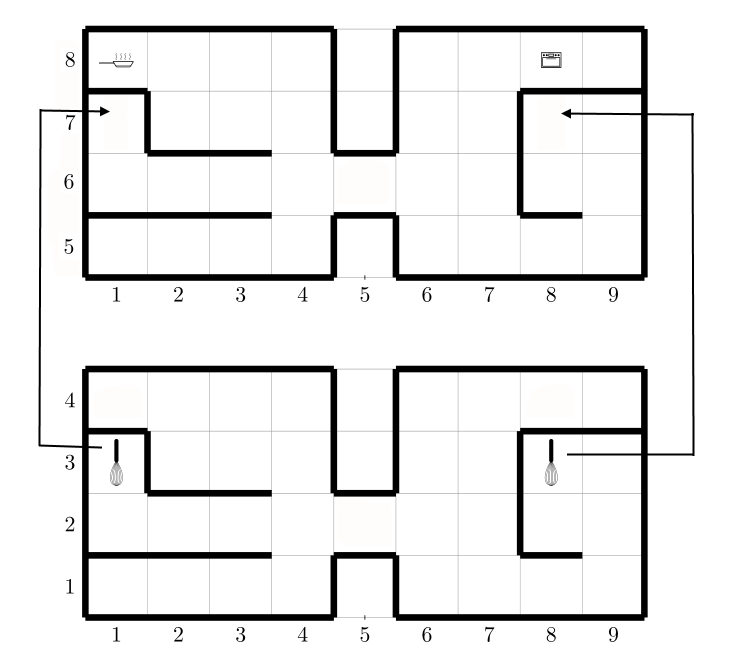

In [17]:
Image("img/cooking_chef_mdp.png")

- Nella griglia situata in basso (nella figura sopra), l'agente ha l'obiettivo di raggiungere uno dei due sbattitori

- Non appena l'agente esegue l'azione **take_egg_beater** da una delle due posizioni contenenti uno sbattitore, esso viene portato nella griglia in alto seguendo le frecce mostrate:
    - se l'agente prende lo sbattitore in posizione **(3, 1)** nella griglia in basso, esso viene portato nella griglia in alto in posizione **(7, 1)**
    - se l'agente prende lo sbattitore in posizione **(3, 8)** nella griglia in basso, esso viene portato nella griglia in alto in posizione **(7, 8)**


- Nella griglia situata in alto (nella figura sopra), l'agente ha l'obiettivo di raggiungere una delle due postazioni di cucina e di eseguire quindi l'azione **cook_eggs**:
    - la postazione di cucina per il piatto **scrambled eggs** è situato in posizione **(8, 1)**
    - la postazione di cucina per il piatto **pudding eggs** è situato in posizione **(8, 8)**

- Le posizioni sono state numerate (da 0 a 65). Gli stati numerati costituiscono l'insieme di stati possibili. Verrà ora stampata la griglia di stati possibili (ordinati secondo le posizioni descritte nella figura sopra)

In [18]:
print_states()

 58  59  60  61      62  63  64  65 
 50  51  52  53      54  55  56  57 
 41  42  43  44  45  46  47  48  49 
 33  34  35  36      37  38  39  40 


 25  26  27  28      29  30  31  32 
 17  18  19  20      21  22  23  24 
 8   9   10  11  12  13  14  15  16 
 0   1   2   3       4   5   6   7  


- Come si può notare dalla stampa in alto, le posizioni impossibili non sono state aggiunte tra gli stati possibili

- In conclusione, l'insieme $S$ è il seguente:

In [19]:
mdp.S = np.array(list(cooking_chef_states_tuples.keys()), dtype=np.int64)
mdp.S

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

#### **a2) How many states are in this MDP? (i.e. what is $|S|$)**

- Il numero di stati ($|S|$) è:

In [20]:
len(mdp.S)

66

### Creazione insieme di azioni $A$

#### **b1) Provide a concise description of the actions of the MDP**

- L'agente può effettuare le **azioni di movimento** (**left**, **right**, **up**, **down**) e inoltre può effettuare alcune **azioni speciali** possibili in stati specifici:
    - L'azione **take_egg_beater** corrisponde all'azione di prendere lo sbattitore. A seguito della sua applicazione, l'agente viene portato nella seconda griglia

    - L'azione **cook_eggs** corrisponde all'azione di cucinare le uova. In questo caso, l'applicazione di questa azione porta l'agente a rimanere fermo (absorbing state). L'esecuzione di questa azione rappresenta l'obiettivo finale dell'agente

- In conclusione, l'insieme $A$ è il seguente:
    - azione $0$: **left ←**
    - azione $1$: **right →**
    - azione $2$: **up ↑**
    - azione $3$: **down ↓**
    - azione $4$: **take_egg_beater T**
    - azione $5$: **cook_eggs C**

In [21]:
left = 0
right = 1
up = 2
down = 3
take_egg_beater = 4
cook_eggs = 5

actions = [left, right, up, down, take_egg_beater, cook_eggs]

In [22]:
mdp.A = np.array(actions, dtype=np.int64)
mdp.A

array([0, 1, 2, 3, 4, 5])

#### **b2) How many actions are in this MDP? (i.e. what is $|A|$)**

- Il numero di azioni ($|A|$) è:

In [23]:
len(mdp.A)

6

- la seguente struttura dati associa ad ogni stato del problema le azioni che possono essere eseguite da esso

In [24]:
# associazione:
# stato -> array di azioni possibili
actions_mapping = {
    0: [1],
    1: [0, 1],
    2: [0, 1],
    3: [0, 2],
    4: [1, 2],
    5: [0, 1, 2],
    6: [0, 1],
    7: [0, 2],
    8: [1, 2],
    9: [0, 1],
    10: [0, 1],
    11: [0, 1, 2, 3],
    12: [0, 1],
    13: [0, 1, 2, 3],
    14: [0, 2, 3],
    15: [1, 2],
    16: [0, 2, 3],
    17: [3, 4],
    18: [1, 2],
    19: [0, 1, 2],
    20: [0, 2, 3],
    21: [1, 2, 3],
    22: [0, 2, 3],
    23: [1, 3, 4],
    24: [0, 3],
    25: [1],
    26: [0, 1, 3],
    27: [0, 1, 3],
    28: [0, 3],
    29: [1, 3],
    30: [0, 1, 3],
    31: [0, 1],
    32: [0],
    33: [1],
    34: [0, 1],
    35: [0, 1],
    36: [0, 2],
    37: [1, 2],
    38: [0, 1, 2],
    39: [0, 1],
    40: [0, 2],
    41: [1, 2],
    42: [0, 1],
    43: [0, 1],
    44: [0, 1, 2, 3],
    45: [0, 1],
    46: [0, 1, 2, 3],
    47: [0, 2, 3],
    48: [1, 2],
    49: [0, 2, 3],
    50: [3],
    51: [1, 2],
    52: [0, 1, 2],
    53: [0, 2, 3],
    54: [1, 2, 3],
    55: [0, 2, 3],
    56: [1, 3],
    57: [0, 3],
    58: [1, 5],
    59: [0, 1, 3],
    60: [0, 1, 3],
    61: [0, 3],
    62: [1, 3],
    63: [0, 1, 3],
    64: [0, 1, 5],
    65: [0],
}

In [25]:
mdp.am = ActionsMapping(actions_mapping)

### Creazione insieme di transizioni $P$

- Verrà creata la matrice di transizioni $P[A, S, S']$. Essa è una matrice a 3 dimensioni

- Verranno definite alcune funzioni ausiliarie per poter procedere alla creazione automatizzata di essa

- Non ci sono effetti imprevisti a seguito dell'applicazione delle azioni: da uno stato sorgente $s$ applicando l'azione $a$, abbiamo soltanto uno stato destinazione $s'$ (stato raggiungibile con probabilità $1$)

- **Esempio**: la figura seguente descrive graficamente il comportamento dell'agente a seguito dell'applicazione dell'azione **up**:

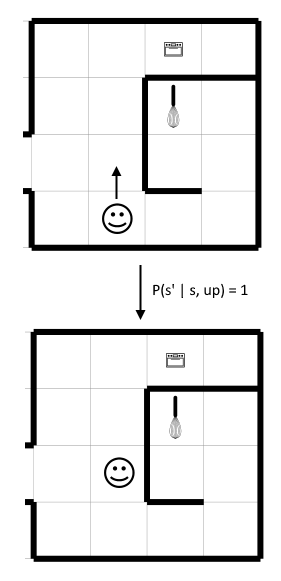

In [26]:
Image("img/cooking_chef_mdp_part_a_transitions.png")

In [27]:
# funzione che, dati come parametro uno stato s ed un'azione a,
# ritorna il prossimo stato in cui si troverà l'agente.
#
# `s`: parametro che specifica lo stato in cui l'agente esegue l'azione
#
# `a`: parametro che specifica l'azione che l'agente esegue
#
# return: prossimo stato in cui l'agente si troverà dopo l'applicazione
# dell'azione
def get_next_state(s: int, a: int):
    state_tuple = cooking_chef_states_tuples[s]
    tile = None
    if a == 0:
        # azione left
        tile = (state_tuple[0], state_tuple[1] - 1)
    elif a == 1:
        # azione right
        tile = (state_tuple[0], state_tuple[1] + 1)
    elif a == 2:
        # azione up
        tile = (state_tuple[0] + 1, state_tuple[1])
    elif a == 3:
        # azione down
        tile = (state_tuple[0] - 1, state_tuple[1])
    elif a == 4:
        # azione take_egg_beater
        if s == 17:
            # azione take_egg_beater dallo stato 17 (17 -> 50)
            tile = cooking_chef_states_tuples[50]
        elif s == 23:
            # azione take_egg_beater dallo stato 23 (23 -> 56)
            tile = cooking_chef_states_tuples[56]
        else:
            raise RuntimeError("Azione take_egg_beater non valida")

    elif a == 5:
        # azione cook_eggs
        tile = state_tuple

    else:
        raise RuntimeError("Azione non valida")

    return cooking_chef_tuples_states[tile]

In [28]:
# generazione delle transizioni
def generate_mdp_transitions(
    actions: np.ndarray, states: np.ndarray, mapping: ActionsMapping
):
    transitions = np.zeros(
        shape=(len(actions), len(states), len(states)), dtype=np.float64
    )

    for state in states:
        for action in mapping.get_possible_actions_from_state(state):
            if mapping.probs(action, state) > 0.0:
                # l'azione `action` è possibile dallo stato `state`
                # non ci sono effetti imprevisti, c'è solo uno stato destinazione
                # raggiungibile con probabilità 1
                transitions[action, state, get_next_state(state, action)] = 1

    return transitions


mdp.P = generate_mdp_transitions(mdp.A, mdp.S, mdp.am)

#### **c) What is the dimensionality of the transition function $P$?**

- La funzione di transizione è stata codificata come una matrice a 3 dimensioni $P[A, S, S']$:
    - $A$: azioni
    - $S$: stati sorgente
    - $S'$: stati destinazione


- La dimensionalità della funzione di transizione è quindi: $|P| = |A| \times |S| \times |S|$, in conclusione:

In [29]:
# |P| = |A| x |S| x |S|
mdp.P.shape

(6, 66, 66)

$|P| = 6 \times 66 \times 66$

#### **d) Report the transition function $P$ for any state $s$ and action $a$ in a tabular format**

- Verrà riportata la transition function $P$ per ogni azione specificata, stampando una tabella che descrive (per l'azione scelta) una matrice $S \times S' = 66 \times 66$

- Le matrici saranno anche salvate in file **CSV** esterni (directory: `transitions/part_a`)

##### $P[\text{left}, S, S']$

In [30]:
mdp_part_a_transition_left = mdp.print_transitions_matrix(action=left)
mdp_part_a_transition_left.to_csv("transitions/part_a/mdp_part_a_transition_left.csv")

# ogni entry > 0 viene evidenziata
mdp_part_a_transition_left.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{right}, S, S']$

In [31]:
mdp_part_a_transition_right = mdp.print_transitions_matrix(action=right)
mdp_part_a_transition_right.to_csv("transitions/part_a/mdp_part_a_transition_right.csv")

# ogni entry > 0 viene evidenziata
mdp_part_a_transition_right.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{up}, S, S']$

In [32]:
mdp_part_a_transition_up = mdp.print_transitions_matrix(action=up)
mdp_part_a_transition_up.to_csv("transitions/part_a/mdp_part_a_transition_up.csv")

# ogni entry > 0 viene evidenziata
mdp_part_a_transition_up.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{down}, S, S']$

In [33]:
mdp_part_a_transition_down = mdp.print_transitions_matrix(action=down)
mdp_part_a_transition_down.to_csv("transitions/part_a/mdp_part_a_transition_down.csv")

# ogni entry > 0 viene evidenziata
mdp_part_a_transition_down.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{take_egg_beater}, S, S']$

In [34]:
mdp_part_a_transition_take_egg_beater = mdp.print_transitions_matrix(
    action=take_egg_beater
)
mdp_part_a_transition_take_egg_beater.to_csv(
    "transitions/part_a/mdp_part_a_transition_take_egg_beater.csv"
)

# ogni entry > 0 viene evidenziata
mdp_part_a_transition_take_egg_beater.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{cook_eggs}, S, S']$

In [35]:
mdp_part_a_transition_cook_eggs = mdp.print_transitions_matrix(action=cook_eggs)
mdp_part_a_transition_cook_eggs.to_csv(
    "transitions/part_a/mdp_part_a_transition_cook_eggs.csv"
)

# ogni entry > 0 viene evidenziata
mdp_part_a_transition_cook_eggs.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

- Verranno ora stampate solo le transizioni con probabilità $> 0$ in un formato tabellare più leggibile:

In [36]:
mdp.print_transitions()

Sorgente (s) Destinazione (s') Azione (a)  Probabilità (P[a, s, s'])
0             s1                s0          0                        1.0
1             s2                s1          0                        1.0
2             s3                s2          0                        1.0
3             s5                s4          0                        1.0
4             s6                s5          0                        1.0
5             s7                s6          0                        1.0
6             s9                s8          0                        1.0
7            s10                s9          0                        1.0
8            s11               s10          0                        1.0
9            s12               s11          0                        1.0
10           s13               s12          0                        1.0
11           s14               s13          0                        1.0
12           s16               s15          0                        1.0
13           s19               s18          0                        1.0
14           s20               s19          0                        1.0
15           s22               s21          0                        1.0
16           s24               s23          0                        1.0
17           s26               s25          0                        1.0
18           s27               s26          0                        1.0
19           s28               s27          0                        1.0
20           s30               s29          0                        1.0
21           s31               s30          0                        1.0
22           s32               s31          0                        1.0
23           s34               s33          0                        1.0
24           s35               s34          0                        1.0
25           s36               s35          0                        1.0
26           s38               s37          0                        1.0
27           s39               s38          0                        1.0
28           s40               s39          0                        1.0
29           s42               s41          0                        1.0
30           s43               s42          0                        1.0
31           s44               s43          0                        1.0
32           s45               s44          0                        1.0
33           s46               s45          0                        1.0
34           s47               s46          0                        1.0
35           s49               s48          0                        1.0
36           s52               s51          0                        1.0
37           s53               s52          0                        1.0
38           s55               s54          0                        1.0
39           s57               s56          0                        1.0
40           s59               s58          0                        1.0
41           s60               s59          0                        1.0
42           s61               s60          0                        1.0
43           s63               s62          0                        1.0
44           s64               s63          0                        1.0
45           s65               s64          0                        1.0
46            s0                s1          1                        1.0
47            s1                s2          1                        1.0
48            s2                s3          1                        1.0
49            s4                s5          1                        1.0
50            s5                s6          1                        1.0
51            s6                s7          1                        1.0
52            s8                s9          1                        1.0
53            s9               s10          1                 

### Creazione insieme di rewards $R$

#### **e) Describe a reward function $R: S \times A \times S$ and a value of $\gamma$ that will lead to an optimal policy**

- La funzione reward è stata codificata come una matrice a 3 dimensioni $R[A, S, S']$:
    - $A$: azioni
    - $S$: stati sorgente
    - $S'$: stati destinazione

- Un possibile approccio alla scelta dei **rewards** da assegnare all'agente per guidarlo nella risoluzione del problema è il seguente:
    - premiamo di molto il raggiungimento dell'obiettivo finale ($+1000$): cucinare le uova dalla postazione di cucina in accordo alla ricetta utilizzata (per la ricetta **scrambled eggs** la postazione è situata nello stato **58**, per la ricetta **pudding eggs** la postazione è situata nello stato **64**)
    - premiamo il raggiungimento dell'obiettivo intermedio ($+500$): prendere lo sbattitore di uova da una delle postazioni possibili (situate negli stati **17** e **23**)
    - i rewards rimanenti sono tutti settati a $0$


- Settando il parametro $\gamma$ ad un valore vicino ad $1$, l'agente ad ogni stato darà molta importanza alla reward futura e verrà quindi guidato al meglio verso gli obiettivi

- gli obiettivi verranno raggiunti nel modo più veloce e diretto possibile dato che, settando soltanto i rewards che corrispondono agli obiettivi e dando molta importanza alla reward futura, l'agente sarà spinto a raggiungerli il prima possibile

- Per il settaggio dei rewards, considereremo prima la ricetta **pudding eggs** e successivamente la ricetta **scrambled eggs**

In [37]:
# creazione dell'insieme R[A, S, S']
mdp.R = np.zeros(shape=(len(mdp.A), len(mdp.S), len(mdp.S)), dtype=np.float64)

# premiamo l'agente se esegue l'azione cook_eggs da uno degli stati obiettivi
# (58 o 64 in base alla ricetta utilizzata).
# In questo scenario (pudding eggs) verrà settato il reward per cook_eggs
# sullo stato obiettivo 64, postazione di cucina per la ricetta pudding eggs
mdp.R[cook_eggs, 64, 64] = 1000
mdp.R[cook_eggs, 58, 58] = 0

# premiamo l'agente se esegue l'azione take_egg_beater dagli stati obiettivi
# 17 e 23
mdp.R[take_egg_beater, 17, 50] = 500
mdp.R[take_egg_beater, 23, 56] = 500

# tutti gli altri rewards vengono lasciati a 0

- Verranno ora stampati soltanto i rewards $\neq 0$ in formato tabellare

In [38]:
mdp.print_rewards()

Sorgente (s) Destinazione (s') Azione (a)  Reward (R[a, s, s'])
0          s17               s50          4                 500.0
1          s23               s56          4                 500.0
2          s64               s64          5                1000.0

- Il parametro $\gamma$ indica l'importanza da dare ai rewards futuri

- Verrà settato un valore $\gamma = 0.9$. In modo che l'agente dia molta importanza ai rewards futuri per poter essere guidato al meglio verso gli obiettivi

In [39]:
mdp.gamma = 0.9

### Tentativo di risoluzione mediante Policy Iteration

- E' ora possibile utilizzare l'algoritmo **Policy Iteration** per trovare la policy ottima per il problema specificato

- La policy ottima trovata verrà stampata a video

- Consideriamo per prima lo scenario in cui l'agente deve cucinare la ricetta **pudding eggs**

In [40]:
mdp_pi = mdp.policy_iteration()

In [41]:
print_policy(policy=mdp_pi)

 →  →  →  ↓     →  →  C  ← 
 ↓  →  →  ↓     ↑  ↑  →  ↓ 
 →  →  →  →  →  ↑  ↑  →  ↓ 
 →  →  →  ↑     ↑  ↑  ←  ← 


 →  →  →  ↓     ↓  ↓  ←  ← 
 T  →  →  ↓     ↓  ↓  T  ← 
 ↑  ←  ←  ←  ←  ←  ↓  ↑  ← 
 →  →  →  ↑     →  →  →  ↑ 


- Consideriamo ora lo scenario in cui l'agente deve cucinare la ricetta **scrambled eggs**

In [42]:
# azzeriamo il reward per la postazione di cucina
# della ricetta pudding eggs
mdp.R[cook_eggs, 64, 64] = 0

# settiamo il reward per la postazione di cucina
# della ricetta scrambled eggs
mdp.R[cook_eggs, 58, 58] = 1000

In [43]:
mdp_pi = mdp.policy_iteration()

In [44]:
print_policy(policy=mdp_pi)

 C  ←  ←  ←     ↓  ←  ←  ← 
 ↓  ↑  ←  ←     ↓  ←  →  ↓ 
 →  →  →  ↑  ←  ←  ←  →  ↓ 
 →  →  →  ↑     ↑  ←  ←  ← 


 →  →  →  ↓     ↓  ↓  ←  ← 
 T  →  →  ↓     ↓  ↓  T  ← 
 ↑  ←  ←  ←  ←  ←  ↓  ↑  ← 
 →  →  →  ↑     →  →  →  ↑ 


- Come si può notare per entrambi gli scenari, nella policy ottima trovata l'agente cerca di raggiungere gli obiettivi nel modo più veloce e diretto possibile

- Verrà lasciato lo scenario **scrambled eggs** come scenario di default

#### **f) Does $\gamma \in (0, 1)$ affect the optimal policy in this case? Explain why**

- Testeremo alcuni valori $\gamma \in (0, 1)$: cioè, valori gamma compresi nell'intervallo $0 < \gamma < 1$

- Verranno quindi presentate le policy ottime calcolate mediante **Policy Iteration** utilizzando i seguenti parametri $\gamma$:
    - $\gamma = 0.1$
    - $\gamma = 0.3$
    - $\gamma = 0.4$
    - $\gamma = 0.5$
    - $\gamma = 0.8$
    - $\gamma = 0.9$


- $\gamma = 0$ e $\gamma = 1$ non verranno testati poichè essi non sono compresi nell'intervallo $0 < \gamma < 1$

In [45]:
def test_multiple_gamma(list_of_gamma: list):
    policies = []
    # test delle gamma specificate
    for g in list_of_gamma:
        print()
        print(f"Gamma = {g}")
        print()
        mdp_test = MDP(mdp.S, mdp.A, mdp.P, mdp.R, mdp.am, gamma=g)
        pi_test = mdp_test.policy_iteration()
        policies.append((pi_test, g))
        print_policy(policy=pi_test)
        print()
        print("--------------------------")

    # rilevamento differenze tra le policies
    # calcolate
    diff = False
    for p1 in policies:
        for p2 in policies:
            if not np.array_equal(p1[0], p2[0]):
                diff = True
                print(
                    f"- Le policies risultanti da gamma = {p1[1]} e gamma = {p2[1]} differiscono"
                )
    if diff:
        print()
        print("!- Sono state rilevate differenze tra le policies risultanti")
    else:
        print("!- Nessuna differenza rilevata tra le policies risultanti")


test_multiple_gamma([0.1, 0.3, 0.4, 0.5, 0.8, 0.9])


Gamma = 0.1

 C  ←  ←  ←     ←  ←  ←  ← 
 ←  ↑  ←  ↑     ↓  ←  ←  ← 
 →  →  →  ↑  ←  ←  ←  ←  ← 
 ←  →  →  ↑     ↑  ←  ←  ← 


 ←  →  →  ↓     ↓  ↓  ←  ← 
 T  →  →  ↓     ↓  ↓  T  ← 
 ↑  ←  ←  ←  ←  ←  ↓  ↑  ← 
 →  →  →  ↑     →  →  →  ↑ 

--------------------------

Gamma = 0.3

 C  ←  ←  ←     ↓  ←  ←  ← 
 ↓  ↑  ←  ←     ↓  ←  ←  ← 
 →  →  →  ↑  ←  ←  ←  ←  ↓ 
 →  →  →  ↑     ↑  ←  ←  ← 


 →  →  →  ↓     ↓  ↓  ←  ← 
 T  →  →  ↓     ↓  ↓  T  ← 
 ↑  ←  ←  ←  ←  ←  ↓  ↑  ← 
 →  →  →  ↑     →  →  →  ↑ 

--------------------------

Gamma = 0.4

 C  ←  ←  ←     ↓  ←  ←  ← 
 ↓  ↑  ←  ←     ↓  ←  →  ↓ 
 →  →  →  ↑  ←  ←  ←  →  ↓ 
 →  →  →  ↑     ↑  ←  ←  ← 


 →  →  →  ↓     ↓  ↓  ←  ← 
 T  →  →  ↓     ↓  ↓  T  ← 
 ↑  ←  ←  ←  ←  ←  ↓  ↑  ← 
 →  →  →  ↑     →  →  →  ↑ 

--------------------------

Gamma = 0.5

 C  ←  ←  ←     ↓  ←  ←  ← 
 ↓  ↑  ←  ←     ↓  ←  →  ↓ 
 →  →  →  ↑  ←  ←  ←  →  ↓ 
 →  →  →  ↑     ↑  ←  ←  ← 


 →  →  →  ↓     ↓  ↓  ←  ← 
 T  →  →  ↓     ↓  ↓  T  ← 
 ↑  ←  ←  ← 

- Come è possibile vedere dalle stampe delle policy ottime trovate, le policy ottime trovate differiscono. Quindi $\gamma \in (0, 1)$ influenza la policy ottima in questo caso

- Il parametro $\gamma$ (**discount factor**) descrive quanto l'agente si preoccupa dei rewards futuri. Nel caso in cui $\gamma = 0$, l'agente tiene conto soltanto dei rewards immediati. Più $\gamma$ è vicino ad $1$ più l'agente è interessato ai rewards futuri. Nel caso in cui $\gamma = 1$, l'agente è preoccupato dei rewards futuri come dei rewards immediati

- Per come è stata specificata la nostra reward function, l'agente deve poter considerare il più possibile i rewards futuri. E' preferibile quindi avere $\gamma \rightarrow 1$

- Questo perchè se l'agente si trovasse in uno stato in cui ciascuna azione porterebbe ad avere reward 0, senza considerare i rewards futuri ($\gamma \rightarrow 0$) l'agente non saprebbe scegliere l'azione migliore da seguire. Invece con $\gamma \rightarrow 1$, l'agente considererebbe ed utilizzerebbe i reward futuri per raggiungere al meglio l'obiettivo

#### **g) How many possible policies are there? (*all policies*, not just optimal policies)**

- Il numero di policy deterministiche è: $|A|^{|S|}$, quindi in questo caso sarà $6^{66}$:

In [46]:
# |A|
len(mdp.A)

6

In [47]:
# |S|
len(mdp.S)

66

In [48]:
# |A|^|S|
len(mdp.A) ** len(mdp.S)

2280250319867037997421842330085227917956272625811456

#### **h) Specifica di uno scenario Model-free**

- Verrà ora considerato uno scenario **Model-free**. In questo caso, non sarà possibile accedere al **transition model** e al **reward model** del problema

- Per la specifica **Model-free**, consideriamo soltanto lo scenario **scrambled eggs**

##### **Preparazione scenario Model-free**

In [49]:
mf = ModelFree()

- Vengono utilizzati gli stessi stati specificati dall'MDP precedente

In [50]:
print_states()

 58  59  60  61      62  63  64  65 
 50  51  52  53      54  55  56  57 
 41  42  43  44  45  46  47  48  49 
 33  34  35  36      37  38  39  40 


 25  26  27  28      29  30  31  32 
 17  18  19  20      21  22  23  24 
 8   9   10  11  12  13  14  15  16 
 0   1   2   3       4   5   6   7  


In [51]:
mf.S = mdp.S
mf.S

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65])

- Vengono utilizzate le stesse azioni specificate dall'MDP precedente

In [52]:
mf.A = mdp.A
mf.A

array([0, 1, 2, 3, 4, 5])

- Per poter guidare al meglio l'agente, specificheremo i rewards su ogni stato del problema considerato

- L'approccio utilizzato è il seguente:
    - premiamo di molto il raggiungimento dell'obiettivo finale ($+100$): cucinare le uova dalla postazione di cucina per la ricetta **scrambled eggs** (situata nello stato **58**)
    - premiamo il raggiungimento dell'obiettivo intermedio ($+50$): prendere lo sbattitore di uova da una delle postazioni possibili (situate negli stati **17** e **23**)
    - premiamo l'agente ogni volta che va nella direzione giusta ($+1$)
    - penalizziamo l'agente se esegue un'azione non valida ($-1$)
    - nei casi rimanenti il reward dato all'agente è $0$

In [53]:
# R[A, S]
episode_rewards = np.zeros(
    shape=(len(actions), len(mf.S)),
    dtype=np.float64,
)

# reward per cook_eggs dallo stato 58
episode_rewards[cook_eggs, 58] = 100

# reward per take_egg_beater dagli stati 17 e 23
episode_rewards[take_egg_beater, 17] = 50
episode_rewards[take_egg_beater, 23] = 50

# premiamo l'agente se va in direzione degli obiettivi
episode_rewards[right, 0] = 1
episode_rewards[right, 1] = 1
episode_rewards[right, 2] = 1
episode_rewards[up, 3] = 1

episode_rewards[right, 4] = 1
episode_rewards[right, 5] = 1
episode_rewards[right, 6] = 1
episode_rewards[up, 7] = 1

episode_rewards[up, 8] = 1
episode_rewards[left, 9] = 1
episode_rewards[left, 10] = 1
episode_rewards[left, 11] = 1

episode_rewards[left, 12] = 1

episode_rewards[left, 13] = 1
episode_rewards[down, 14] = 1
episode_rewards[up, 15] = 1
episode_rewards[left, 16] = 1

episode_rewards[right, 18] = 1
episode_rewards[right, 19] = 1
episode_rewards[down, 20] = 1

episode_rewards[down, 21] = 1
episode_rewards[down, 22] = 1
episode_rewards[left, 24] = 1

episode_rewards[right, 25] = 1
episode_rewards[right, 26] = 1
episode_rewards[right, 27] = 1
episode_rewards[down, 28] = 1

episode_rewards[down, 29] = 1
episode_rewards[down, 30] = 1
episode_rewards[left, 31] = 1
episode_rewards[left, 32] = 1

episode_rewards[right, 33] = 1
episode_rewards[right, 34] = 1
episode_rewards[right, 35] = 1
episode_rewards[up, 36] = 1

episode_rewards[up, 37] = 1
episode_rewards[left, 38] = 1
episode_rewards[left, 39] = 1
episode_rewards[left, 40] = 1

episode_rewards[right, 41] = 1
episode_rewards[right, 42] = 1
episode_rewards[right, 43] = 1
episode_rewards[up, 44] = 1

episode_rewards[left, 45] = 1

episode_rewards[left, 46] = 1
episode_rewards[left, 47] = 1
episode_rewards[right, 48] = 1
episode_rewards[down, 49] = 1

episode_rewards[down, 50] = 1
episode_rewards[up, 51] = 1
episode_rewards[left, 52] = 1
episode_rewards[left, 53] = 1

episode_rewards[down, 54] = 1
episode_rewards[left, 55] = 1
episode_rewards[right, 56] = 1
episode_rewards[down, 57] = 1

episode_rewards[left, 59] = 1
episode_rewards[left, 60] = 1
episode_rewards[left, 61] = 1

episode_rewards[down, 62] = 1
episode_rewards[left, 63] = 1
episode_rewards[left, 64] = 1
episode_rewards[left, 65] = 1


# penalizziamo l'agente se esegue azioni non valide (-1)
for s in mf.S:
    for a in mf.A:
        # settiamo il reward a -1 se l'azione `a` non è valida
        # nello stato `s`
        # (ovvero quando non è possibile eseguire l'azione
        # `a` dallo stato `s`)
        if mdp.am.probs(a, s) == 0.0:
            episode_rewards[a, s] = -1

# i rimanenti rewards sono settati a 0

##### **Implementazione scenario Model-free**

- Inizializzazione del **generatore di episodi** (entità che ha il compito di generare episodi a partire da policy $\pi$). Esso utilizzerà i rewards stabiliti sopra. Un episodio ha la seguente forma: $(s_1, a_1, r_1), (s_2, a_2, r_2), \dots, (s_T, a_T, r_T)$

In [54]:
generator = EpisodeGenerator(episode_rewards)

mf.generator = generator

- Verrà scelto $\gamma = 0.1$: daremo poca importanza ai rewards futuri dato che l'agente può essere guidato al meglio dai rewards immediati grazie ai rewards definiti sopra

In [55]:
mf.gamma = 0.1

- Sono stati specificati gli elementi necessari per poter utilizzare l'approccio **Model-free**
- Verrà eseguito l'algoritmo **Monte Carlo Online Control** per cercare di trovare una buona policy attraverso gli episodi generati
- Infine verrà stampata una griglia che descrive la policy trovata

##### **Risoluzione mediante Monte Carlo Online Control**

In [56]:
mf_pi = mf.monte_carlo_online_control(max_iterations=10000, status_step=1000)

Iterazione: 1000 / 10000
Iterazione: 2000 / 10000
Iterazione: 3000 / 10000
Iterazione: 4000 / 10000
Iterazione: 5000 / 10000
Iterazione: 6000 / 10000
Iterazione: 7000 / 10000
Iterazione: 8000 / 10000
Iterazione: 9000 / 10000
Iterazione: 10000 / 10000


##### **Stampa della policy trovata**

In [57]:
print_policy(policy=mf_pi)

 C  ←  ←  ←     ↓  ←  ←  ← 
 ↓  ↑  ←  ←     ↓  ←  →  ↓ 
 →  →  →  ↑  ←  ←  ←  →  ↓ 
 →  →  →  ↑     →  ←  ←  ↑ 


 →  →  →  ↓     ↓  ←  ←  ← 
 T  →  →  ↓     ↓  ↓  T  ← 
 ↑  ←  ←  ←  ←  ←  ↓  ↑  ← 
 →  →  ←  ↑     →  →  ←  ↑ 


- Come si nota dall'output, la policy trovata è buona ma non è perfetta. Probabilmente, aumentando il numero di iterazioni massime dell'algoritmo, si riesce a convergere ad una policy migliore

#### **i) Is the computed policy deterministic or stochastic?**

- La policy computata è **deterministica** dato che ad ogni stato della policy computata abbiamo una singola azione da seguire

#### **j) Is there any advantage to having a stochastic policy? Explain**

- Le policy stocastiche sono in generale più robuste delle policy deterministiche nel caso in cui ci sia incertezza. Quindi, le policy stocastiche sono molto utili in presenza di osservabilità parziale oppure nel caso di ambienti stocastici

## Parte B

- In questa sezione, verrà specificato un **MDP** in cui le azioni possono portare a diversi **effetti probabilistici**

- Dato che l'agente è stanco, spesso sbaglierà strada:
    - **60%**: probabilità dell'agente di andare **perpendicolare a sinistra** nella direzione scelta
    - **40%**: probabilità dell'agente di andare **perpendicolare a destra** nella direzione scelta


- Quindi l'agente sbaglierà strada con probabilità $60\% + 40\% = 100\%$

- **Assunzione**: assumiamo che nel caso in cui l'agente si muova in direzione di un muro (quindi una direzione non valida), esso torni nella posizione di partenza

- **Esempio**: la figura seguente descrive graficamente il comportamento dell'agente a seguito dell'applicazione dell'azione **up**:

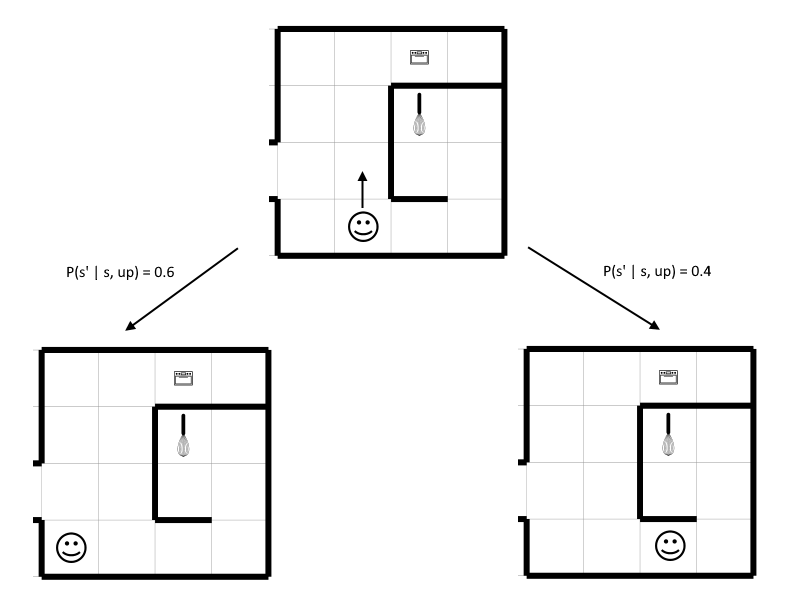

In [58]:
Image("img/cooking_chef_mdp_part_b_transitions.png")

- Di seguito vengono mostrati i passi necessari alla creazione del nuovo **MDP** e alla sua risoluzione attraverso la **Policy Iteration**. Successivamente verranno date le risposte alle domande della **Parte B**

In [59]:
mdp_err = MDP()

### Creazione insieme di stati $S$

- Vengono utilizzati gli stessi stati specificati dall'MDP precedente

In [60]:
mdp_err.S = mdp.S

### Creazione insieme di azioni $A$

- Vengono utilizzate le stesse azioni specificate dall'MDP precedente

In [61]:
mdp_err.A = mdp.A

In [62]:
mdp_err.am = ActionsMapping(actions_mapping)

### Creazione insieme di transizioni $P$ con effetti probabilistici

- Creazione dell'insieme di transizioni possibili $P$

- Verranno definite alcune funzioni ausiliarie per poter procedere alla creazione automatizzata di essa

- In questo caso le transizioni sono stocastiche, da uno stato sorgente $s$ applicando l'azione $a$, abbiamo più stati destinazione $s'$ possibili (stati raggiungibili con diverse probabilità)

- Un esempio di transizione viene mostrato nell'introduzione della [Parte B](#Parte-B)

In [63]:
# definizione della struttura dati che contiene gli stati
# vicini (array posto come valore delle entries nel dizionario)
# non raggiungibili da uno specifico stato
# (chiave delle entries nel dizionario)
walls = {
    # griglia in basso
    0: [8],
    1: [9],
    2: [10],
    3: [4],
    4: [3],
    6: [15],
    8: [0],
    9: [1, 18],
    10: [2, 19],
    14: [15],
    15: [6, 14],
    17: [18, 25],
    18: [9, 17],
    19: [10],
    20: [21],
    21: [20],
    22: [23],
    23: [22, 31],
    24: [32],
    25: [17, 33],
    26: [34],
    27: [35],
    28: [29, 36],
    29: [28, 37],
    30: [38],
    31: [23, 39],
    32: [24, 40],
    # griglia in alto
    33: [25, 41],
    34: [26, 42],
    35: [27, 43],
    36: [28, 37],
    37: [29, 36],
    38: [30],
    39: [31, 48],
    40: [32],
    41: [33],
    42: [34, 51],
    43: [35, 52],
    47: [48],
    48: [39, 47],
    50: [51, 58],
    51: [42, 50],
    52: [43],
    53: [54],
    54: [53],
    55: [56],
    56: [55, 64],
    57: [65],
    58: [50],
    61: [62],
    62: [61],
    64: [56],
    65: [57],
}

In [64]:
# funzione che data la tupla di partenza `start_pos`
# e la tupla di arrivo `end_pos`, ritorna un booleano
# che indica se è avvenuta una collisione con un muro.
#
# `start_pos`: posizione di partenza dell'agente
#
# `end_pos`: posizione di arrivo dell'agente
#
# return: True, se è avvenuta una collisione, False altrimenti.
def wall_collision(start_pos: tuple, end_pos: tuple):
    start_state = cooking_chef_tuples_states[start_pos]
    end_state = None

    try:
        end_state = cooking_chef_tuples_states[end_pos]
    except KeyError:
        return True

    try:
        if end_state in walls[start_state]:
            return True
        else:
            return False
    except KeyError:
        return False

In [65]:
# funzione che data la tupla di partenza `start_pos`
# e la tupla che corrisponde al possibile arrivo `end_pos`,
# ritorna la tupla che corrisponde alla reale posizione
# di arrivo dell'agente.
#
# `start_pos`: posizione di partenza dell'agente
#
# `end_pos`: posizione di arrivo possibile dell'agente
#
# return: posizione reale di arrivo dell'agente
def new_tile_pos(start_pos: tuple, end_pos: tuple):
    collision = wall_collision(start_pos, end_pos)

    if collision:
        # in caso di collisione, l'agente torna nella
        # posizione di partenza
        return start_pos
    else:
        # la posizione di arrivo possibile è valida, viene
        # quindi ritornata
        return end_pos

In [66]:
# funzione che dati come parametro uno stato `s` ed un'azione `a`
# ritorna l'insieme di prossimi stati in cui si potrebbe
# trovare l'agente considerando il fatto che l'agente è stanco
# e quindi sbaglierà strada:
# Ciascuna azione ha il:
#   - 60% di probabilità di andare perpendicolare a sinistra nella direzione
#         scelta
#   - 40% di probabilità di andare perpendicolare a destra nella direzione
#         scelta
#
# `s`: parametro che specifica lo stato in cui l'agente esegue l'azione
#
# `a`: parametro che specifica l'azione che l'agente esegue
#
# return: insieme di tuple che contengono i prossimi stati possibili
# in cui l'agente si troverà a seguito dell'applicazione dell'azione
# insieme alle relative probabilità
def get_next_state_errors(s: int, a: int):
    state_tuple = cooking_chef_states_tuples[s]
    tiles = []
    if a == 0:
        # azione sinistra
        # risultato: 60% sotto, 40% sopra
        tile_down = new_tile_pos(state_tuple, (state_tuple[0] - 1, state_tuple[1]))

        tile_up = new_tile_pos(state_tuple, (state_tuple[0] + 1, state_tuple[1]))

        tiles.append((tile_down, 0.6))
        tiles.append((tile_up, 0.4))

    elif a == 1:
        # azione destra
        # risultato: 60% sopra, 40% sotto
        tile_up = new_tile_pos(state_tuple, (state_tuple[0] + 1, state_tuple[1]))

        tile_down = new_tile_pos(state_tuple, (state_tuple[0] - 1, state_tuple[1]))

        tiles.append((tile_up, 0.6))
        tiles.append((tile_down, 0.4))

    elif a == 2:
        # azione sopra
        # risultato: 60% sinistra, 40% destra
        tile_left = new_tile_pos(state_tuple, (state_tuple[0], state_tuple[1] - 1))

        tile_right = new_tile_pos(state_tuple, (state_tuple[0], state_tuple[1] + 1))

        tiles.append((tile_left, 0.6))
        tiles.append((tile_right, 0.4))

    elif a == 3:
        # azione sotto
        # risultato: 60% destra, 40% sinistra
        tile_right = new_tile_pos(state_tuple, (state_tuple[0], state_tuple[1] + 1))

        tile_left = new_tile_pos(state_tuple, (state_tuple[0], state_tuple[1] - 1))

        tiles.append((tile_right, 0.6))
        tiles.append((tile_left, 0.4))

    elif a == 4:
        # azione take_egg_beater (stati: 17 or 23), non ci sono errori
        # per questa azione
        if s == 17:
            tiles.append((cooking_chef_states_tuples[50], 1.0))
        elif s == 23:
            tiles.append((cooking_chef_states_tuples[56], 1.0))
        else:
            raise RuntimeError("Azione take_egg_beater non valida")

    elif a == 5:
        # azione cook_eggs, non ci sono errori per questa azione
        tiles.append((state_tuple, 1.0))

    else:
        raise RuntimeError("Azione non valida")

    # lancia un'eccezione se avviene un KeyError
    return [(cooking_chef_tuples_states[tile[0]], tile[1]) for tile in tiles]

In [67]:
# funzione che analizza le transizioni passate come parametro
# e, se due transizioni hanno come componenti: lo stesso stato,
# azione e nuovo stato, allora le probabilità contenute nelle due
# transizioni vengono sommate.
#
# `transitions`: array che contiene le transizioni da filtrare
#
# return: array di tuple che corrisponde alle transizioni filtrate
def filter_transitions(transitions: list):
    results = {}
    for transition in transitions:
        state, action, new_state, state_prob = transition
        try:
            results[(state, action, new_state)] += state_prob
        except KeyError:
            results[(state, action, new_state)] = state_prob

    return [(key[0], key[1], key[2], state_prob) for key, state_prob in results.items()]

In [68]:
# P[A, S, S']


def generate_stochastic_mdp_transitions(
    actions: np.ndarray, states: np.ndarray, mapping: ActionsMapping
):
    stochastic_transitions = np.zeros(
        shape=(len(actions), len(states), len(states)), dtype=np.float64
    )

    for state in states:
        for action in mapping.get_possible_actions_from_state(state):
            if mapping.probs(action, state) > 0.0:
                # l'azione `action` è possibile dallo stato `state`
                # ma ci sono effetti imprevisti: più stati destinazione
                # raggiungibili con diverse probabilità
                valid_transitions = []
                for new_state_with_prob in get_next_state_errors(state, action):
                    new_state, state_prob = new_state_with_prob
                    # inseriamo nella lista `valid_transitions` tutte
                    # le transizioni possibili a seguito
                    # dell'applicazione dell'azione valida `action`
                    valid_transitions.append((state, action, new_state, state_prob))

                # inseriamo le transizioni filtrate in P
                for transition in filter_transitions(valid_transitions):
                    s, a, ns, sp = transition
                    stochastic_transitions[a, s, ns] = sp
    return stochastic_transitions


mdp_err.P = generate_stochastic_mdp_transitions(mdp_err.A, mdp_err.S, mdp_err.am)

### Creazione insieme di rewards $R$

- Vengono utilizzati gli stessi rewards specificati dall'MDP precedente

In [69]:
mdp_err.R = mdp.R

### Specifica del parametro $\gamma$

- Specifichiamo lo stesso parametro $\gamma$ specificato durante la costruzione dell'MDP della **parte A**. In questo modo possiamo confrontare al meglio i due MDP

In [70]:
mdp_err.gamma = mdp.gamma

### Tentativo di risoluzione mediante Policy Iteration

- E' ora possibile utilizzare l'algoritmo **Policy Iteration** per trovare la policy ottima per il problema specificato

In [71]:
mdp_err_pi = mdp_err.policy_iteration()

In [72]:
print_policy(policy=mdp_err_pi)

 C  ↓  ↓  ↓     ←  ←  ←  ← 
 ←  →  ↑  ↑     ←  ←  ←  ← 
 ←  ←  ←  →  ←  ←  ←  ←  ← 
 ←  ←  ←  ←     ←  ←  ←  ← 


 ←  ←  ←  ←     ←  ←  ←  ← 
 T  ←  ←  ←     ←  ←  T  ↓ 
 →  ←  ←  ←  ←  ←  ←  →  ↑ 
 ←  ←  ←  ←     ←  ←  ←  ← 


- Come si nota dall'output, in molte caselle l'agente rimane intrappolato. Questo accade poichè ogni azione possibile in queste caselle porta l'agente a rimanere fermo (poichè tali azioni porterebbero l'agente a collidere con un muro)

#### **a) Report the transition function $P$ for any state $s$ and action $a \in A$**

- Verrà riportata la transition function $P$ per ogni azione specificata, stampando una tabella che descrive (per l'azione scelta) una matrice $S \times S' = 66 \times 66$

- Le matrici saranno anche salvate in file **CSV** esterni (directory: `transitions/part_b`)

##### $P[\text{left}, S, S']$

In [73]:
mdp_part_b_transition_left = mdp_err.print_transitions_matrix(action=left)
mdp_part_b_transition_left.to_csv("transitions/part_b/mdp_part_b_transition_left.csv")

# ogni entry > 0 viene evidenziata
mdp_part_b_transition_left.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{right}, S, S']$

In [74]:
mdp_part_b_transition_right = mdp_err.print_transitions_matrix(action=right)
mdp_part_b_transition_right.to_csv("transitions/part_b/mdp_part_b_transition_right.csv")

# ogni entry > 0 viene evidenziata
mdp_part_b_transition_right.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{up}, S, S']$

In [75]:
mdp_part_b_transition_up = mdp_err.print_transitions_matrix(action=up)
mdp_part_b_transition_up.to_csv("transitions/part_b/mdp_part_b_transition_up.csv")

# ogni entry > 0 viene evidenziata
mdp_part_b_transition_up.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{down}, S, S']$

In [76]:
mdp_part_b_transition_down = mdp_err.print_transitions_matrix(action=down)
mdp_part_b_transition_down.to_csv("transitions/part_b/mdp_part_b_transition_down.csv")

# ogni entry > 0 viene evidenziata
mdp_part_b_transition_down.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{take_egg_beater}, S, S']$

In [77]:
mdp_part_b_transition_take_egg_beater = mdp_err.print_transitions_matrix(
    action=take_egg_beater
)
mdp_part_b_transition_take_egg_beater.to_csv(
    "transitions/part_b/mdp_part_b_transition_take_egg_beater.csv"
)

# ogni entry > 0 viene evidenziata
mdp_part_b_transition_take_egg_beater.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

##### $P[\text{cook_eggs}, S, S']$

In [78]:
mdp_part_b_transition_cook_eggs = mdp_err.print_transitions_matrix(action=cook_eggs)
mdp_part_b_transition_cook_eggs.to_csv(
    "transitions/part_b/mdp_part_b_transition_cook_eggs.csv"
)

# ogni entry > 0 viene evidenziata
mdp_part_b_transition_cook_eggs.style.apply(
    lambda x: ["background: yellow" if v > 0 else "" for v in x], axis=1
)

- Verranno ora stampate solo le transizioni con probabilità $> 0$ in un formato tabellare più leggibile:

In [79]:
mdp_err.print_transitions()

Sorgente (s) Destinazione (s') Azione (a)  Probabilità (P[a, s, s'])
0             s1                s1          0                        1.0
1             s2                s2          0                        1.0
2             s3                s3          0                        0.6
3             s3               s11          0                        0.4
4             s5                s5          0                        0.6
5             s5               s14          0                        0.4
6             s6                s6          0                        1.0
7             s7                s7          0                        0.6
8             s7               s16          0                        0.4
9             s9                s9          0                        1.0
10           s10               s10          0                        1.0
11           s11                s3          0                        0.6
12           s11               s20          0                        0.4
13           s12               s12          0                        1.0
14           s13                s4          0                        0.6
15           s13               s21          0                        0.4
16           s14                s5          0                        0.6
17           s14               s22          0                        0.4
18           s16                s7          0                        0.6
19           s16               s24          0                        0.4
20           s19               s19          0                        0.6
21           s19               s27          0                        0.4
22           s20               s11          0                        0.6
23           s20               s28          0                        0.4
24           s22               s14          0                        0.6
25           s22               s30          0                        0.4
26           s24               s16          0                        0.6
27           s24               s24          0                        0.4
28           s26               s18          0                        0.6
29           s26               s26          0                        0.4
30           s27               s19          0                        0.6
31           s27               s27          0                        0.4
32           s28               s20          0                        0.6
33           s28               s28          0                        0.4
34           s30               s22          0                        0.6
35           s30               s30          0                        0.4
36           s31               s31          0                        1.0
37           s32               s32          0                        1.0
38           s34               s34          0                        1.0
39           s35               s35          0                        1.0
40           s36               s36          0                        0.6
41           s36               s44          0                        0.4
42           s38               s38          0                        0.6
43           s38               s47          0                        0.4
44           s39               s39          0                        1.0
45           s40               s40          0                        0.6
46           s40               s49          0                        0.4
47           s42               s42          0                        1.0
48           s43               s43          0                        1.0
49           s44               s36          0                        0.6
50           s44               s53          0                        0.4
51           s45               s45          0                        1.0
52           s46               s37          0                        0.6
53           s46               s54          0                 

#### **b) Does the optimal policy change compared to Part A? Justify your answer**

- Policy ottima trovata a seguito dell'applicazione della **Policy Iteration** sull'**MDP** risolto nella **parte A**:

In [80]:
print_policy(policy=mdp.optimal_policy)

 C  ←  ←  ←     ↓  ←  ←  ← 
 ↓  ↑  ←  ←     ↓  ←  →  ↓ 
 →  →  →  ↑  ←  ←  ←  →  ↓ 
 →  →  →  ↑     ↑  ←  ←  ← 


 →  →  →  ↓     ↓  ↓  ←  ← 
 T  →  →  ↓     ↓  ↓  T  ← 
 ↑  ←  ←  ←  ←  ←  ↓  ↑  ← 
 →  →  →  ↑     →  →  →  ↑ 


- Policy ottima trovata a seguito dell'applicazione della **Policy Iteration** sull'**MDP** risolto nella **parte B**:

In [81]:
print_policy(policy=mdp_err.optimal_policy)

 C  ↓  ↓  ↓     ←  ←  ←  ← 
 ←  →  ↑  ↑     ←  ←  ←  ← 
 ←  ←  ←  →  ←  ←  ←  ←  ← 
 ←  ←  ←  ←     ←  ←  ←  ← 


 ←  ←  ←  ←     ←  ←  ←  ← 
 T  ←  ←  ←     ←  ←  T  ↓ 
 →  ←  ←  ←  ←  ←  ←  →  ↑ 
 ←  ←  ←  ←     ←  ←  ←  ← 


- La policy trovata nella parte B **cambia** rispetto alla policy trovata nella parte A. Questo accade poichè l'agente commette **sempre** errori dato che è stanco (l'agente con probabilità 60% si muove perpendicolare a sinistra rispetto alla direzione scelta, mentre con probabilità 40% si muove perpendicolare a destra rispetto alla direzione scelta: l'agente sbaglia quindi con probabilità $60\% + 40\% = 100\%$)

- L'agente della parte B non potrà mai muoversi nella direzione giusta. Mentre l'agente della parte A si muoverà sempre nella direzione giusta (esso non sbaglia mai direzione)

- Inoltre, l'agente della parte B rimane spesso intrappolato, dato che in molte caselle ciascuna azione possibile porta l'agente a rimanere fermo (dato che tali azioni porterebbero l'agente a collidere con un muro)

#### **c) Will the value of the optimal policy change? Explain how**

- $V_{A}^{\pi}$ calcolata a seguito dell'applicazione della **Policy Iteration** sull'**MDP** risolto nella **parte A**:

In [82]:
mdp.state_value_function

array([8.41064489e-01, 9.34516241e-01, 2.07670290e+00, 4.61489548e+00,
       1.84528217e+00, 4.10062705e+00, 1.36687568e+01, 3.03750152e+01,
       2.25082547e+02, 1.01287146e+02, 4.55792155e+01, 1.02553234e+01,
       4.61489548e+00, 1.03835145e+00, 1.23018811e+00, 2.25000113e+02,
       6.75000338e+01, 5.00183437e+02, 4.15340552e-01, 9.22979067e-01,
       3.07659699e+00, 3.11505414e-01, 3.69056432e-01, 5.00000251e+02,
       2.25000113e+02, 1.12141894e-01, 1.24602147e-01, 4.15340552e-01,
       1.38446860e+00, 1.40177415e-01, 1.10716928e-01, 4.98226165e-02,
       4.48403523e-02, 4.07639170e-01, 4.52932554e-01, 1.00651693e+00,
       2.23670443e+00, 2.26466277e-01, 6.79398617e-02, 3.05729164e-02,
       1.37577910e-02, 4.52932554e-01, 1.00651693e+00, 2.23670443e+00,
       4.97045443e+00, 2.23670443e+00, 5.03258464e-01, 1.50977518e-01,
       1.85728110e-03, 4.12732303e-03, 4.07639170e-01, 2.45454545e+02,
       7.36363633e+01, 2.20909089e+01, 1.50977518e-01, 4.52932411e-02,
      

- Stampa di $V_{A}^{\pi}$ nell'ordine di posizione nella griglia di stati (i numeri sono stati arrotondati):

In [83]:
print_state_value_function(V_pi=mdp.state_value_function)

 1818.18   545.45    163.64    73.64               0.07      0.02      0.01      0.01     
 0.41      245.45    73.64     22.09               0.15      0.05      0.0       0.0      
 0.45      1.01      2.24      4.97      2.24      0.5       0.15      0.0       0.0      
 0.41      0.45      1.01      2.24                0.23      0.07      0.03      0.01     


 0.11      0.12      0.42      1.38                0.14      0.11      0.05      0.04     
 500.18    0.42      0.92      3.08                0.31      0.37      500.0     225.0    
 225.08    101.29    45.58     10.26     4.61      1.04      1.23      225.0     67.5     
 0.84      0.93      2.08      4.61                1.85      4.1       13.67     30.38    


In [84]:
sum(mdp.state_value_function)

4931.509575386304

- $V_{B}^{\pi}$ calcolata a seguito dell'applicazione della **Policy Iteration** sull'**MDP** risolto nella **parte B**:

In [85]:
mdp_err.state_value_function

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.30346566e+00,
       1.64634146e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.64634146e+02,
       3.36751663e+01, 5.00000000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e+02,
       1.23287671e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.44457631e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.83030113e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.35017296e+01,
       1.35632268e+01, 2.77429636e+00, 0.00000000e+00, 0.00000000e+00,
      

- Stampa di $V_{B}^{\pi}$ nell'ordine di posizione nella griglia di stati (i numeri sono stati arrotondati):

In [86]:
print_state_value_function(V_pi=mdp_err.state_value_function)

 1818.18   223.23    28.03     6.91                0.0       0.0       0.0       0.0      
 0.0       73.5      13.56     2.77                0.0       0.0       0.0       0.0      
 0.0       0.0       0.0       0.38      0.0       0.0       0.0       0.0       0.0      
 0.0       0.0       0.0       0.09                0.0       0.0       0.0       0.0      


 0.0       0.0       0.0       0.0                 0.0       0.0       0.0       0.0      
 500.0     0.0       0.0       0.0                 0.0       0.0       500.0     123.29   
 164.63    0.0       0.0       0.0       0.0       0.0       0.0       164.63    33.68    
 0.0       0.0       0.0       0.0                 0.0       0.0       0.0       8.3      


In [87]:
sum(mdp_err.state_value_function)

3661.203909211263

- Il valore della policy ottima trovata **cambia**. Questo accade poichè anche se abbiamo utilizzato lo stesso reward model definito nell'MDP della parte A, abbiamo inserito cambiamenti nel transition model che portano l'agente a sbagliare ad ogni mossa

- A causa dei cambiamenti introdotti, in molte tessere, ogni azione possibile porterebbe l'agente a rimanere fermo (dato che tali azioni lo porterebbero a collidere con un muro)

- Questi cambiamenti vanno ad influire pesantemente sulla $V_{\pi}$ calcolata: come infatti si può notare nella $V_{B}^{\pi}$ calcolata per la parte B, abbiamo molti zeri proprio per questi motivi

- In conclusione, il valore della policy ottima trovata nella parte B differisce dal valore della policy ottima trovata nella parte A

- Il valore della policy ottima per l'MDP della parte B è minore del valore della policy ottima per l'MDP della parte A: $V_{B}^{\pi} < V_{A}^{\pi}$